**Feature Engineering**

In [ ]:
from sklearn.feature_extraction import text
from os import path
ObjRead = open("/content/AST_A.txt", encoding='utf-8')
corpus = ObjRead.read();
ObjRead.close()
input=[corpus]
vectorizer = text.CountVectorizer(binary=True).fit(input)
vectorized_text = vectorizer.transform(input)
print(vectorized_text.todense())

[[1 1 1 ... 1 1 1]]


The TF-IDF transformation is a technique that, after counting how many times a token appears in a phrase, divides the value by the number of documents in which the token appears. Using this technique, the vectorizer deems a word less important, even if it appears many times in a text, when it also finds that word in other texts.

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
TfidF = text.TfidfTransformer(norm='l1')
tfidf = TfidF.fit_transform(vectorized_text)
phrase=0
total=2
for word in vectorizer.vocabulary_:
  pos = vectorizer.vocabulary_[word]
  value = list(tfidf.toarray()[phrase])[pos]
  if value !=0:
      print ("%10s: %0.3f" % (word, value))
      total += value
print ('\nSummed values of a phrase: %0.1f' % total)

     after: 0.001
    nearly: 0.001
      five: 0.001
     month: 0.001
     delay: 0.001
    caused: 0.001
        by: 0.001
   missing: 0.001
information: 0.001
 officials: 0.001
        at: 0.001
       the: 0.001
   federal: 0.001
  aviation: 0.001
administration: 0.001
      have: 0.001
     begun: 0.001
 reviewing: 0.001
   license: 0.001
application: 0.001
       for: 0.001
  proposed: 0.001
 spaceport: 0.001
    camden: 0.001
   kenneth: 0.001
      wong: 0.001
   manager: 0.001
        of: 0.001
       faa: 0.001
 licensing: 0.001
       and: 0.001
evaluation: 0.001
  division: 0.001
  informed: 0.001
    county: 0.001
commission: 0.001
  chairman: 0.001
        in: 0.001
    letter: 0.001
     dated: 0.001
      june: 0.001
        28: 0.001
      that: 0.001
   stalled: 0.001
    review: 0.001
       had: 0.001
      been: 0.001
 restarted: 0.001
        on: 0.001
       feb: 0.001
        12: 0.001
      2019: 0.001
        we: 0.001
determined: 0.001
        to: 0.001
    

Using this new TF-IDF model rescales the values of important words and makes them comparable between each text in the corpus. To recover part of the ordering of the text before the BoW transformation, adding n-grams

**Bi-Grams**. The following example uses CountVectorizer to model n-grams in the range of (2, 2), that is, bigrams.

In [ ]:
bigrams = text.CountVectorizer(ngram_range=(2,2))
print (bigrams.fit(input).vocabulary_)

{'after nearly': 159, 'nearly five': 2772, 'five month': 1564, 'month delay': 2704, 'delay caused': 1190, 'caused by': 881, 'by missing': 784, 'missing information': 2694, 'information officials': 2109, 'officials at': 2989, 'at the': 540, 'the federal': 4293, 'federal aviation': 1516, 'aviation administration': 562, 'administration have': 131, 'have begun': 1877, 'begun reviewing': 664, 'reviewing license': 3558, 'license application': 2499, 'application for': 422, 'for the': 1625, 'the proposed': 4387, 'proposed spaceport': 3397, 'spaceport camden': 3933, 'camden kenneth': 824, 'kenneth wong': 2348, 'wong manager': 5083, 'manager of': 2612, 'of the': 2966, 'the faa': 4289, 'faa licensing': 1465, 'licensing and': 2510, 'and evaluation': 298, 'evaluation division': 1406, 'division informed': 1254, 'informed the': 2111, 'the camden': 4246, 'camden county': 813, 'county commission': 1108, 'commission chairman': 981, 'chairman in': 896, 'in letter': 2056, 'letter dated': 2488, 'dated june

**Stemming and Wordstop Removal**. The following example demonstrates how to perform stemming and remove stop words from a sentence. It begins by training an algorithm to perform the required analysis using a test sentence. Afterward, the example checks a second sentence for words that appear in the first.
The first output shows the stemmed words. All the stop words are missing as well. For example, you don’t see the words so, he, all, or the. The second output shows how many times each stemmed word appears in the test sentence. 

In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
# load data
filename = '/content/AST_A.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
# split into words
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)
# convert to lower case
tokens = [w.lower() for w in tokens]
# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]
# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]
# filter out stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
ast_clean=' '.join(words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
#filename is complete path to file plus name and .txt extension
file = open('ast_clean.txt', 'w')
file.write(ast_clean)
file.close()

**Frequency Distribution**

['nearly fivemonth delay caused missing information officials federal aviation administration begun reviewing license application proposed spaceport camden kenneth wong manager faa licensing evaluation division informed camden county commission chairman letter dated june stalled review restarted feb determined application complete enough begin review due four outstanding issues wong wrote letter requested information concerning environmental review mitigation potential risk fire analysis individual risk ability account manage population might exposed risk overflight launch vehicle received additional information june camden county planning build operate commercial spaceport operators would launch liquidfueled small mediumlarge vehicles operation would include vertical launches landings per year spaceport camden would located brownfield site occupied union carbide less miles cumberland island national seashore five miles little cumberland island residents visitors cumberland little cumb

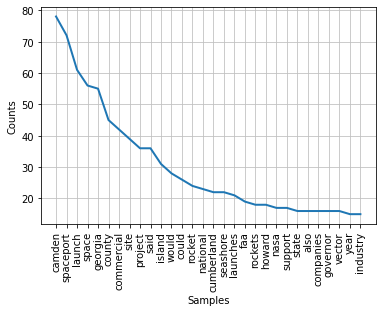

In [3]:
import nltk
# Tokenize text
from nltk.tokenize import sent_tokenize
from os import path
ObjRead = open("/content/ast_clean.txt", encoding='utf-8')
text = ObjRead.read();
ObjRead.close()
tokenized_text=sent_tokenize(text)
print(tokenized_text)

# Tokenize words
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

# Frequency Distribution
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

# Ten most common words
fdist.most_common(10)

# Frequency Distribution Plots
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()


**Text Summarization**

In [ ]:
from os import path
ObjRead = open("/content/AST_A.txt")
txtContent = ObjRead.read();
ObjRead.close()

In [ ]:
from gensim.summarization import summarize 
print (summarize(txtContent)) 

After a nearly five-month delay caused by missing information, officials at the Federal Aviation Administration have begun reviewing a license application for the proposed Spaceport Camden .
Camden County is planning to build and operate a commercial spaceport where operators would launch liquid-fueled , small to medium-large vehicles .
We are now at T-minus 1 , a final decision by the FAA is the only outstanding item , Steve Howard , Spaceport Camden Project lead and Camden County administrator , said in a press release .
I have proudly supported Spaceport Camden from the first time I heard about this amazing project and all it can do for Georgia , said Gov.
The state of Georgia is firmly behind Camden County and we encourage the FAA to swiftly approve its launch site operator’s license application .
It’s too dangerous , Weinkle said , because the rockets would have to launch over Little Cumberland Island where the private owners and guests can’t be forced to evacuate .
Camden’s rocke

In [ ]:
print ('Summary:')
print (summarize(txtContent, word_count=600))

Summary:
We are now at T-minus 1 , a final decision by the FAA is the only outstanding item , Steve Howard , Spaceport Camden Project lead and Camden County administrator , said in a press release .
Camden’s rocket launching fantasy will only degrade these precious resources: polluting the salt marsh and tidal creeks , closing waters to commercial and recreational fishing , disrupting traffic to the Port of Brunswick , disturbing the visitor experience and operations at Cumberland Island National Seashore and destroying public and private property .
The Camden (Georgia) County Board of Commissioners sees the spaceport as an economic boon , one that could both attract commercial space flight companies and tourists interested in craning their necks as a launch arcs through the sky .
With the Federal Aviation Administration poised to release a final environmental impact statement on the proposed launch facility by mid-December , with a go-no go decision from the agency expected in January

**Topic Modeling using NMF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
tfidf = vectorizer.fit_transform(input)
from sklearn.decomposition import NMF
n_topics = 5
nmf = NMF(n_components=n_topics, random_state=101).fit(tfidf)
feature_names = vectorizer.get_feature_names()
n_top_words = 15
for topic_idx, topic in enumerate(nmf.components_):
   print ("Topic #%d:" % (topic_idx+1),)
   print (" ".join([feature_names[i] for i in
                    topic.argsort()[:-n_top_words - 1:-1]])) 

Topic #1:
camden spaceport launch space georgia county commercial site said project island rocket national cumberland launches
Topic #2:
casey support economic small near flight park smart mid location georgia long approved brian lead
Topic #3:
12 running canaveral knowledge ocean parking governor advance owned seashore bring residents 000 officials press
Topic #4:
rural operators central lie followers visited steven story mitigate asked discussed assessment examine offer betting
Topic #5:
vertical homes structures involves officials party sector loses 15 hold december lead attract wallops south


By using the argsort method, you can get the indexes of the top associations, whose high values indicate that they are the most representative words.

In [ ]:
print (nmf.components_[0,:].argsort()[:-n_top_words-1:-1])
# Gets top words for topic 0

[ 222 1327  779 1323  606  340  289 1298 1235 1102  732 1218  926  353
  781]


**Identify the representative words**

In [ ]:
print (vectorizer.get_feature_names()[222])
print (vectorizer.get_feature_names()[1327])
print (vectorizer.get_feature_names()[779])
print (vectorizer.get_feature_names()[1323])
print (vectorizer.get_feature_names()[606])
print (vectorizer.get_feature_names()[340])

camden
spaceport
launch
space
georgia
county


**Text Classification** with SVC

In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame
dataset = pd.read_csv('/content/MIA.csv')
data=pd.DataFrame(data=dataset, columns=['text','sentiment'])
data.head()

,text,sentiment
0,Few parts of the core of Central Florida are s...,0
1,"“We are a busy airport,” Brown said.",0
2,“There are not too many places in metropolita...,0
3,Brown said his expectation is that flight path...,0
4,“It will narrow the tracks that aircraft will ...,0


In [ ]:
X=data['text']
y=data['sentiment']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.5, random_state=125)

In [ ]:
from sklearn.feature_extraction import text
vectorizer = text.CountVectorizer(ngram_range=(1,2),
                    stop_words='english').fit(X)
TfidF = text.TfidfTransformer()
X = TfidF.fit_transform(vectorizer.transform(X))
Xt = TfidF.transform(vectorizer.transform(X_test))

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.1, 1.0, 10.0, 100.0]}
clf = GridSearchCV(LinearSVC(loss='hinge',
                    random_state=101), param_grid)
clf = clf.fit(X, y)
y_pred=clf.predict(Xt)
print ("Best parameters: %s" % clf.best_params_)

Best parameters: {'C': 0.01}


In [ ]:
from sklearn.metrics import accuracy_score
solution = clf.predict(Xt)
print("Achieved accuracy: %0.3f" %
      accuracy_score(y_test, solution))

Achieved accuracy: 0.600


In [ ]:
print(X_test[y_test!=solution])

49    I don't give a damn about good windows, I live...
24    Gilderman said the current distribution of the...
10    The FAA plans to conduct its environmental stu...
14    Members of the Miami International Airport Noi...
45    NextGen’s promises to save on fuel and travel ...
33    Public input will be allowed during the enviro...
16    Noise complaints have spiked in communities ne...
19    The federal agency said NextGen will save $15....
28    Satellite-based routes have resulted in flight...
26    It’s going to be nonstop "He predicts concerne...
Name: text, dtype: object


**Classification Report**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        15
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        25
   macro avg       0.20      0.33      0.25        25
weighted avg       0.36      0.60      0.45        25



**Confusion Matrix**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm[::-1, ::-1]

array([[ 0,  0,  5],
       [ 0,  0,  5],
       [ 0,  0, 15]])

**Text Classification**

How to create a classifier

First create a training and test sample

In [ ]:
train = [
...     ('I love this sandwich.', 'pos'),
...     ('this is an amazing place!', 'pos'),
...     ('I feel very good about these beers.', 'pos'),
...     ('this is my best work.', 'pos'),
...     ("what an awesome view", 'pos'),
...     ('I do not like this restaurant', 'neg'),
...     ('I am tired of this stuff.', 'neg'),
...     ("I can't deal with this", 'neg'),
...     ('he is my sworn enemy!', 'neg'),
...     ('my boss is horrible.', 'neg')
... ]
test = [
...     ('the beer was good.', 'pos'),
...     ('I do not enjoy my job', 'neg'),
...     ("I ain't feeling dandy today.", 'neg'),
...     ("I feel amazing!", 'pos'),
...     ('Gary is a friend of mine.', 'pos'),
...     ("I can't believe I'm doing this.", 'neg')
... ]

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train)

Classify a text

In [ ]:
cl.classify("This is an amazing library!")

'pos'

In [ ]:
prob_dist = cl.prob_classify("This one's a doozy.")
print('Overall Sentiment: ',prob_dist.max())

Overall Sentiment:  pos


Provide the probability distributions

In [ ]:
prob_dist = cl.prob_classify("This one's a doozy.")
prob_dist.max() # classify probability of statement

'pos'

In [ ]:
round(prob_dist.prob("pos"), 2) # probability of text being positive

0.63

In [ ]:
round(prob_dist.prob("neg"), 2) # probability of text being negative

0.37

In [ ]:
cl.classify("I am really upset!") # test on a sentence

'neg'

**Sentiment Analysis** with TextBlob

In [ ]:
from textblob import TextBlob
from os import path
ObjRead = open("/content/AST_A.txt")
txtContent = ObjRead.read();
ObjRead.close()
testimonial = TextBlob(txtContent)
testimonial.sentiment

Sentiment(polarity=0.08435739381391548, subjectivity=0.4159659832920702)

In [ ]:
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from os import path
ObjRead = open("/content/AST_A.txt")
txtContent = ObjRead.read();
ObjRead.close()
blob = TextBlob(txtContent, analyzer=NaiveBayesAnalyzer())
blob.sentiment

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Sentiment(classification='pos', p_pos=1.0, p_neg=6.99671245902884e-109)

**Tokenize Text**

In [ ]:
from nltk.tokenize import word_tokenize
tokenizer = word_tokenize(txtContent)
print(tokenizer)

['After', 'a', 'nearly', 'five-month', 'delay', 'caused', 'by', 'missing', 'information', ',', 'officials', 'at', 'the', 'Federal', 'Aviation', 'Administration', 'have', 'begun', 'reviewing', 'a', 'license', 'application', 'for', 'the', 'proposed', 'Spaceport', 'Camden', '.', 'Kenneth', 'Wong', ',', 'manager', 'of', 'the', 'FAA', 'Licensing', 'and', 'Evaluation', 'Division', ',', 'informed', 'the', 'Camden', 'County', 'Commission', 'chairman', 'in', 'a', 'letter', 'dated', 'June', '28', 'that', 'the', 'stalled', 'review', 'had', 'been', 'restarted', '.', 'On', 'Feb.', '12', ',', '2019', ',', 'we', 'determined', 'the', 'application', 'to', 'be', '‘', 'not', 'complete', 'enough', '’', 'to', 'begin', 'the', '180-day', 'review', 'due', 'to', 'four', 'outstanding', 'issues', ',', 'Wong', 'wrote', '.', 'In', 'our', 'letter', ',', 'we', 'requested', 'more', 'information', 'concerning', 'the', 'environmental', 'review', ',', 'mitigation', 'of', 'potential', 'risk', 'of', 'fire', ',', 'analysis

**Chunker**

In [ ]:
import nltk
nltk.download('conll2000')
from textblob import TextBlob
from textblob.np_extractors import ConllExtractor
extractor = ConllExtractor()
blob = TextBlob(txtContent, np_extractor=extractor)
blob.noun_phrases

[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.


WordList(['five-month delay', 'federal aviation administration', 'license application', 'proposed spaceport camden', 'kenneth wong', 'faa licensing', 'evaluation division', 'camden county commission chairman', 'june 28', 'feb', '180-day review due', 'wong', 'environmental review', 'potential risk', 'individual risk', 'additional information', 'june 19', 'camden county', 'commercial spaceport', 'spaceport camden', '12,000-acre brownfield site', 'union carbide', 'cumberland island national seashore', 'little cumberland island', 'cumberland', 'little cumberland', 'environmental impact statement', 'project sponsor factors', 'late last year', 'federal government', 'june 28', 'project backers', 'faa ’', 'final decision', 'faa', 'outstanding item', 'steve howard', 'spaceport camden project', 'camden county administrator', 'press release', 'faa', 'licensing determination', 'today ’', 'spaceport camden', 'first time', 'amazing project', 'georgia', 'gov', 'brian kemp', 'same press release', 'cam

**Entity Recognition**

In [ ]:
from nltk import word_tokenize, pos_tag, ne_chunk
nltk.download('maxent_ne_chunker')
nltk.download('words')
my_string= 'Antonio Guttierez is the Secretary General of the United Nations in New York in the USA'
print(ne_chunk(pos_tag(word_tokenize(my_string))))

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
(S
  (PERSON Antonio/NNP)
  (PERSON Guttierez/NNP)
  is/VBZ
  the/DT
  Secretary/NNP
  General/NNP
  of/IN
  the/DT
  (ORGANIZATION United/NNP Nations/NNPS)
  in/IN
  (GPE New/NNP York/NNP)
  in/IN
  the/DT
  (ORGANIZATION USA/NNP))


**POS Tagger.** 
List of taggers: https://www.learntek.org/blog/categorizing-pos-tagging-nltk-python/

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
from textblob import TextBlob
from textblob.taggers import NLTKTagger
nltk_tagger = NLTKTagger()
blob = TextBlob(txtContent, pos_tagger=nltk_tagger)
blob.pos_tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('After', 'IN'),
 ('a', 'DT'),
 ('nearly', 'RB'),
 ('five-month', 'JJ'),
 ('delay', 'NN'),
 ('caused', 'VBN'),
 ('by', 'IN'),
 ('missing', 'VBG'),
 ('information', 'NN'),
 ('officials', 'NNS'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('Federal', 'NNP'),
 ('Aviation', 'NNP'),
 ('Administration', 'NNP'),
 ('have', 'VBP'),
 ('begun', 'VBN'),
 ('reviewing', 'VBG'),
 ('a', 'DT'),
 ('license', 'NN'),
 ('application', 'NN'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('proposed', 'VBN'),
 ('Spaceport', 'NNP'),
 ('Camden', 'NNP'),
 ('Kenneth', 'NNP'),
 ('Wong', 'NNP'),
 ('manager', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('FAA', 'NNP'),
 ('Licensing', 'NNP'),
 ('and', 'CC'),
 ('Evaluation', 'NNP'),
 ('Division', 'NNP'),
 ('informed', 'VBD'),
 ('the', 'DT'),
 ('Camden', 'NNP'),
 ('County', 'NNP'),
 ('Commission', 'NNP'),
 ('chairman', 'NN'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('letter', 'NN'),
 ('dated', 'VBN'),
 ('June', 'NNP'),
 ('28', 'CD'),
 ('that', 'IN'),
 ('the', 'DT'),
 ('stalled', 'JJ'),
 ('review', 'NN'),
 

**Parser**

In [ ]:
from textblob import TextBlob
from textblob.parsers import PatternParser
blob = TextBlob(txtContent, parser=PatternParser())
blob.parse()

'After/IN/B-PP/B-PNP a/DT/B-NP/I-PNP nearly/RB/I-NP/I-PNP five-month/JJ/I-NP/I-PNP delay/NN/I-NP/I-PNP caused/VBN/B-VP/I-PNP by/IN/B-PP/B-PNP missing/VBG/B-VP/I-PNP information/NN/B-NP/I-PNP ,/,/O/O officials/NNS/B-NP/O at/IN/B-PP/B-PNP the/DT/B-NP/I-PNP Federal/NNP/I-NP/I-PNP Aviation/NNP/I-NP/I-PNP Administration/NNP/I-NP/I-PNP have/VBP/B-VP/O begun/VBN/I-VP/O reviewing/VBG/I-VP/O a/DT/B-NP/O license/NN/I-NP/O application/NN/I-NP/O for/IN/B-PP/O the/DT/O/O proposed/VBN/B-VP/O Spaceport/NNP/B-NP/O Camden/NNP/I-NP/O ././O/O\nKenneth/NNP/B-NP/O Wong/NNP/I-NP/O ,/,/O/O manager/NN/B-NP/O of/IN/B-PP/B-PNP the/DT/B-NP/I-PNP FAA/NNP/I-NP/I-PNP Licensing/NNP/I-NP/I-PNP and/CC/O/O Evaluation/NN/B-NP/O Division/NNP/I-NP/O ,/,/O/O informed/VBN/B-VP/O the/DT/B-NP/O Camden/NNP/I-NP/O County/NNP/I-NP/O Commission/NNP/I-NP/O chairman/NN/I-NP/O in/IN/B-PP/B-PNP a/DT/B-NP/I-PNP letter/NN/I-NP/I-PNP dated/VBN/B-VP/I-PNP June/NNP/B-NP/I-PNP 28/CD/O/O that/IN/B-PP/O the/DT/O/O stalled/VBN/B-VP/O review/N

**Compare Taggers**

In [ ]:
from textblob import Blobber
from textblob.taggers import NLTKTagger
tb = Blobber(pos_tagger=NLTKTagger())
blob1 = tb("This is a blob.")
blob2 = tb("This is another blob.")
blob1.pos_tagger is blob2.pos_tagger

True

**Evaluate overall sentiment**

In [ ]:
from textblob import TextBlob
blob = TextBlob("The beer is good. But the hangover is horrible.", classifier=cl)
blob.classify()

'pos'

In [ ]:
cl.show_informative_features(5)  

Most Informative Features
            contains(my) = True              neg : pos    =      1.7 : 1.0
            contains(an) = False             neg : pos    =      1.6 : 1.0
             contains(I) = False             pos : neg    =      1.4 : 1.0
             contains(I) = True              neg : pos    =      1.4 : 1.0
            contains(my) = False             pos : neg    =      1.3 : 1.0


In [ ]:
blob = TextBlob("The beer is good. But the hangover is horrible.", classifier=cl)
for s in blob.sentences:
     print(s)
     print(s.classify())

The beer is good.
pos
But the hangover is horrible.
neg


In [ ]:
print('Classifier Accuracy: %.3f' % cl.accuracy(test))

Classifier Accuracy: 0.833


In [ ]:
print('Extract features: ', cl.extract_features(txtContent))

Extract features:  {'contains(an)': True, 'contains(best)': True, 'contains(sworn)': False, 'contains(like)': True, 'contains(horrible)': False, 'contains(my)': True, 'contains(feel)': True, 'contains(amazing)': True, 'contains(restaurant)': False, 'contains(do)': True, 'contains(place)': True, 'contains(he)': True, 'contains(I)': True, 'contains(ca)': True, 'contains(what)': True, 'contains(am)': True, 'contains(love)': False, 'contains(very)': True, 'contains(with)': True, 'contains(this)': True, 'contains(stuff)': False, 'contains(deal)': False, 'contains(sandwich)': False, 'contains(view)': False, 'contains(these)': True, 'contains(work)': True, 'contains(of)': True, 'contains(enemy)': False, 'contains(boss)': False, 'contains(is)': True, 'contains(about)': True, 'contains(beers)': False, "contains(n't)": True, 'contains(not)': True, 'contains(good)': True, 'contains(awesome)': False, 'contains(tired)': False}


In [ ]:
from textblob import TextBlob
from textblob.classifiers import MaxEntClassifier
print('Maximum Entropy Classifier: ', MaxEntClassifier(test))

Maximum Entropy Classifier:  <MaxEntClassifier trained on 6 instances>


In [ ]:
new_data = [('She is my best friend.', 'pos'),
...             ("I'm happy to have a new friend.", 'pos'),
...             ("Stay thirsty, my friend.", 'pos'),
...             ("He ain't from around here.", 'neg')]
cl.update(new_data)
print('Accuracy with new data: ', cl.accuracy(test))

Accuracy with new data:  1.0


**Did we update the data?**

In [ ]:
cl.update(new_data)

True

**WordCloud**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


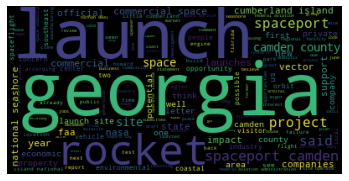

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('punkt')
nltk.download('stopwords')
# load data
filename = '/content/AST_A.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
# split into words
from nltk.tokenize import word_tokenize
word_tokens = word_tokenize(text)
# convert to lower case
word_tokens = [w.lower() for w in word_tokens]
# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in word_tokens]
# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]
# filter out stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
' '.join(words)
from wordcloud import WordCloud 
document_file_path = '/content/AST_A.txt'
text_from_file = open ( '/content/AST_A.txt') . read () 
stop_words = set ( nltk . corpus . stopwords . words ( 'english' )) 
word_tokenize = word_tokenize( text_from_file ) 
filtered_sentence = [ w for w in word_tokens if not w in stop_words ] 
wl_space_split = " " . join ( filtered_sentence ) 
my_wordcloud = WordCloud () . generate ( wl_space_split ) 
plt . imshow ( my_wordcloud ) 
plt . axis ( "off" ) 
plt . show () 

**Finding Synonyms**

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet
syn=wordnet.synsets("automobile")
print(syn)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[Synset('car.n.01'), Synset('automobile.v.01')]


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Cosine Similarity**

In [ ]:
# importing all necessary modules 
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
import nltk

warnings.filterwarnings(action = 'ignore') 
  
import gensim 
from gensim.models import Word2Vec 
  
#  Reads ‘the text’ file 
sample = open("/content/AST_Clean.txt", "r") 
s = sample.read() 
  
# Replaces escape character with space 
f = s.replace("\n", " ") 
  
data = [] 
  
# iterate through each sentence in the file 
for i in sent_tokenize(f): 
    temp = [] 
      
    # tokenize the sentence into words 
    for j in word_tokenize(i): 
        temp.append(j.lower()) 
  
    data.append(temp) 
  
#Create CBOW model 
model1 = gensim.models.Word2Vec(data, min_count = 1, size = 100, window = 5) 
  
#Print results 
print("Cosine similarity between 'spaceport' " + 
               "and 'environmental' - CBOW : ", 
    model1.similarity('spaceport', 'environmental')) 
#Print results 
print("Cosine similarity between 'spaceport' " + 
               "and 'booming' - CBOW : ", 
    model1.similarity('spaceport', 'booming'))

Cosine similarity between 'spaceport' and 'environmental' - CBOW :  0.09163346
Cosine similarity between 'spaceport' and 'booming' - CBOW :  -0.28629297


**Jaccard Index**

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
lemmatizer = WordNetLemmatizer()
pair1 = ["the agency renewed launch certification ","launches will resume soon"]
pair2 = ["leaders come together ", "georgia has the support of local leaders"]
pair3 = ["the area is in the wilderness", "wild life is significant"]
def extract_text_similarity_jaccard (text1, text2):
    words_text1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(text1)]
    words_text2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(text2)]
    nr = len(set(words_text1).intersection(set(words_text2)))
    dr = len(set(words_text1).union(set(words_text2)))
    jaccard_sim = nr/dr
    return jaccard_sim
print("Text Similarity: \n", extract_text_similarity_jaccard(pair1[0],pair1[1]))

Text Similarity: 
 0.125


**Similarity across pairs**

In [ ]:
tfidf_model = TfidfVectorizer()
corpus = [pair1[0], pair1[1], pair2[0], pair2[1], pair3[0], pair3[1]]
tfidf_results = tfidf_model.fit_transform(corpus).todense()
cosine_similarity(tfidf_results[0],tfidf_results[1])

array([[0.]])